In [7]:
import openpyxl

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# reading, saving and stripping the database to extract the usefull data. 
original_df = pd.read_excel(r'Movement_dataset_v2.xlsx')
stripped_df=original_df.drop(columns=["Subject ID","Activity ID","Time stamp"])

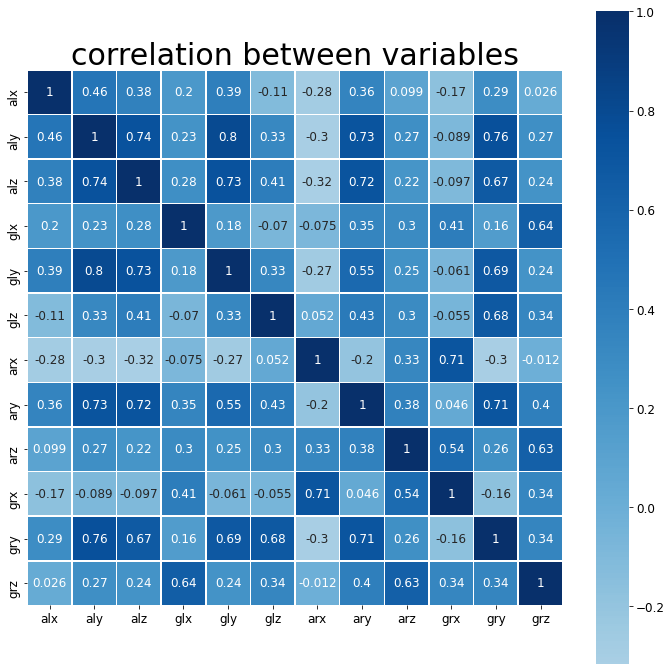

In [8]:
def correlation(savefig_correlation=False):
    """
    Function that calculates, creates and shows the correlation graph.
    The only input is a True or False statement that determines if the image is saved or not.
    """
    #correlation is calculated
    correlation=stripped_df.corr()
    
    # setting up graph appearance
    fig, ax = plt.subplots(figsize=(12, 12))
    plt.rcParams['font.size'] = '12'
    plt.title("correlation between variables",fontsize=30)
    
    # creating heatmap
    sns.heatmap(correlation, cmap="Blues", center=0, square=True, linewidths=.5, annot=True)
    plt.show()
    
    # check if image needs to be saved
    if savefig_correlation==True:
        fig.savefig("_Correlation.png")
        
correlation()

In [9]:
# code/command that checks if empty or NAN values exist in the dataset
original_df.dropna().empty

False

In [10]:
# code/command that checks for duplicate rows and returns the row if true
original_df[original_df.duplicated()==True]

,Subject ID,Activity ID,Time stamp,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz


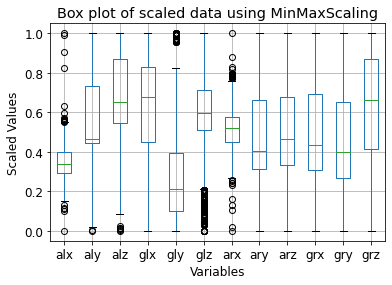

In [11]:
from sklearn.preprocessing import MinMaxScaler
def plot_scaling(savefig_scaling=False):
    """
    Function that plots the minmaxscaling just to take a look at.
    """
    fig, axs = plt.subplots()
    
    # fitting minmaxscalar on the DataFrame
    scaler = MinMaxScaler()
    scaled=scaler.fit_transform(stripped_df)
    
    # Creating the new DataFrame for the boxplot with the right indexes on the X axis
    scaled_df=pd.DataFrame(scaled, columns=stripped_df.columns)
    scaled_df.boxplot()
    
    # adjusting graph appearance
    plt.title("Box plot of scaled data using MinMaxScaling")
    plt.xlabel("Variables")
    plt.ylabel("Scaled Values")
    plt.show()
    
    # image save check
    if savefig_scaling==True:
        fig.savefig("_Scaling.png")
    
plot_scaling()

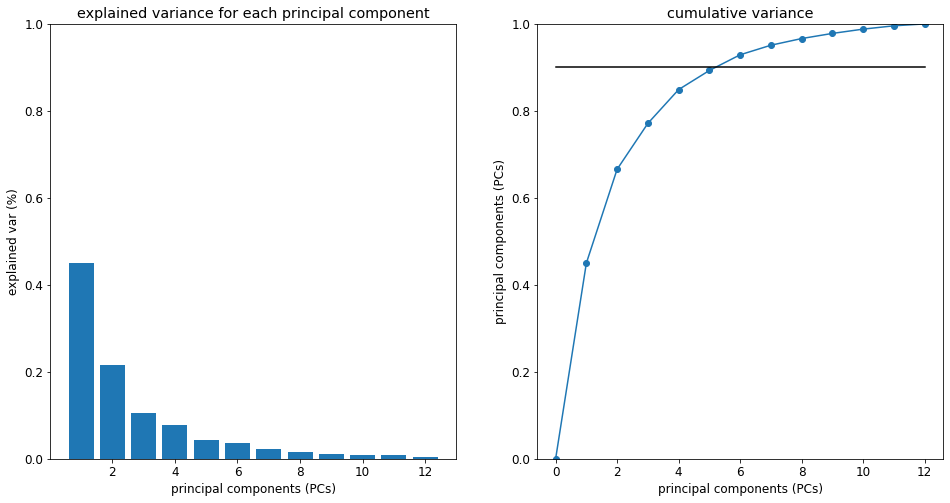

In [47]:

from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression


def plot_variance(savefig_variance=False):
    """
    Function to calculate and plot the variance.
    Input is True or False to save the image.
    """
    fig, ax = plt.subplots(1, 2,figsize=(16,8))
    
    # scaling
    scaler = MinMaxScaler()
    scaled=scaler.fit_transform(stripped_df)

    # Creating principal components
    pca = PCA()
    X_pca = pca.fit_transform(scaled)

    # Converting X_pca to DataFrame
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)

    # grabbing the number of components needed and making a list
    n_components = pca.n_components_
    elements = np.arange(1, n_components + 1)


    # here's the explained variance plotted and calculated
    var_ratio = pca.explained_variance_ratio_
    ax[0].bar(elements, var_ratio)
    
    # setting up subplots appearance
    ax[0].set(
        xlabel="principal components (PCs)", 
        ylabel="explained var (%)",
        title="explained variance for each principal component", 
        ylim=(0, 1)
    )

    # here's the cumulative variance plotted and calculated
    cv = np.cumsum(var_ratio)
    ax[1].plot(np.r_[0, elements], np.r_[0, cv], "o-")
    
    # setting up subplots appearance
    ax[1].set(
        xlabel="principal components (PCs)", 
        ylabel="principal components (PCs)", 
        title="cumulative variance", 
        ylim=(0, 1)
    )

    # plot for line to vizualize the value of 0.9
    ax[1].plot([0,12],[0.9,0.9],color="k")
    
    # creating and calculating the loading dataframe, by transposing the matrix of loadings 
    # so the columns are principal components and rows are original features
    # doing this here because functions mess it up
    loadings = pd.DataFrame(
        pca.components_.T, 
        columns=component_names,  
        index=stripped_df.columns
    )
    
    
    # image save check
    if savefig_variance==True:
        fig.savefig("_Variance.png")
    
    # returning loadings to use after this
    return loadings, X_pca

loadings, X_pca=plot_variance()

In [48]:
# command that prints the highest contributing variable to a certain principal component
print(loadings["PC1"].abs().idxmax())
print(loadings["PC2"].abs().idxmax())
loadings

gry
grx


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
alx,0.062356,-0.040021,0.155468,-0.023896,0.003734,0.169094,0.061560,0.302130,-0.041821,0.281536,0.829539,-0.277387
aly,0.365885,-0.151991,0.212082,-0.170329,0.014297,0.192772,0.310276,-0.270270,-0.733384,0.074374,-0.124995,-0.057844
alz,0.282662,-0.112487,0.137157,-0.066119,0.162222,-0.008323,-0.643178,0.174557,-0.210256,-0.575778,0.155128,0.118066
glx,0.210691,0.481433,0.463271,0.325769,0.248993,-0.343937,-0.013434,0.317251,-0.092281,0.269653,-0.184163,0.082598
gly,0.439722,-0.206725,0.265746,-0.369215,-0.508839,-0.322197,-0.148183,-0.081323,0.328608,0.233862,-0.051713,0.017870
glz,0.271816,-0.102441,-0.677428,0.155476,0.110491,-0.350322,-0.266371,0.018949,-0.228390,0.344271,-0.017158,-0.235192
arx,-0.051196,0.148461,-0.191659,-0.305373,0.109119,-0.108064,0.020065,-0.069244,-0.124022,0.213608,0.279837,0.822953
ary,0.350375,-0.012029,0.044138,-0.003130,0.541961,0.443661,-0.167172,-0.351339,0.409935,0.250273,-0.049504,0.007646
arz,0.191068,0.317378,-0.253091,-0.263870,-0.248605,0.527028,-0.060238,0.544096,-0.018416,0.090059,-0.284746,0.017867
grx,0.027157,0.520583,-0.098475,-0.582351,0.237295,-0.264249,0.133622,-0.161765,0.053348,-0.244813,0.087756,-0.372540


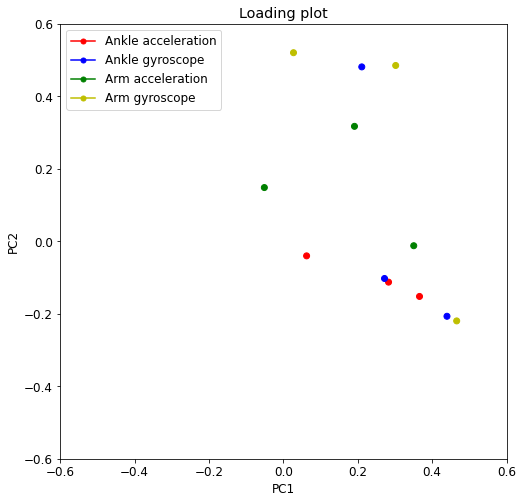

In [49]:
def plot_loading(savefig_loading=False):
    """
    Function to plot the loadings for every variable in a PC1, PC2 plot.
    Input is True or False to save graph .... Again.
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # putting all the needed colors in a list because this works and other things didn't
    colors=["r", "r", "r","b","b","b","g","g","g","y","y","y"]
    plt.scatter(loadings["PC1"],loadings["PC2"], color=colors)
    
    # aesthetic changes to plot
    plt.xlim(-0.6,0.6)
    plt.ylim(-0.6,0.6)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Loading plot")

    # legends are stupid, so they need 2D lines to function properly, else it don't work
    legend_handles = [
        plt.Line2D([], [], color='r', marker='o',markersize=5),
        plt.Line2D([], [], color='b', marker='o',markersize=5),
        plt.Line2D([], [], color='g', marker='o',markersize=5),
        plt.Line2D([], [], color='y', marker='o',markersize=5)   
    ]
    
    # applying the legend and connecting the handles and labels
    plt.legend(legend_handles, ["Ankle acceleration", "Ankle gyroscope", "Arm acceleration", "Arm gyroscope"])
    plt.show()

    # figure saving check
    if savefig_loading==True:
        fig.savefig("_Loading.png")

plot_loading()

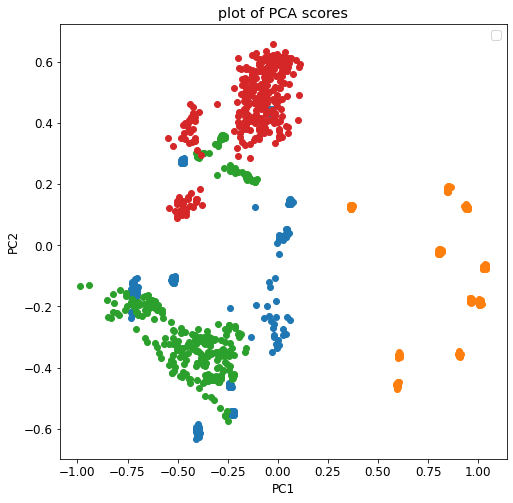

In [52]:
def plot_PCA_scores(grouped_df,savefig_scores=False):
    """
    Function that plots the PCA score plot and returns the group names.
    Input is True or False to save image.
    """
    f, ax = plt.subplots(figsize=(8, 8))
    
    # grabbing group names
    group_names=grouped_df.groups.keys()
    
    # aesthetic changes to plot
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("plot of PCA scores")
    plt.legend(group_names)
    colormap=plt.cm.get_cmap("tab10")
    
    # for loop to give each group its own color and plot them into the plot
    for i in group_names:
        single_group_data = grouped_df.get_group(i)
        plt.scatter( 
            # getting the needed values from dataset
            X_pca.loc[single_group_data.index, 'PC1'],
            X_pca.loc[single_group_data.index, 'PC2'],
            color=colormap(i-1)
        )
        
    # save check
    if savefig_scores==True:
        f.savefig("_Scores.png")
    
    # return group names for later
    return group_names

# groupby to make function reuse possible 
grouped_df=original_df.groupby("Activity ID")
plot_PCA_scores(grouped_df,True)
plt.show()

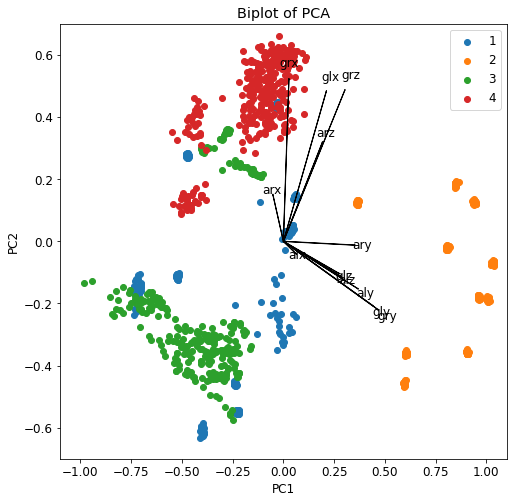

In [53]:

def higlight_plot_biplot(class_id=None,savefig_biplot=False):
    """
    Function to plot the biplot.
    Input is a class_id you want to highlight/overlay and a True Fals statement for saving the plot.
    """
    
    # index is grabbed and put in a list and data is grouped
    index_list = loadings.index.tolist()
    grouped_df=original_df.groupby("Activity ID")
    group_names=grouped_df.groups.keys()
    
    # check to see if the image needs to be saved, 
    # because running the function above this one, breaks saving the image only god knows why.
    if savefig_biplot==True:
        
        # grabbing group names
        group_names=grouped_df.groups.keys()
        
        # aesthetic changes to plot
        colormap=plt.cm.get_cmap("tab10")
        f, ax = plt.subplots(figsize=(8, 8))
        
        # for loop to give each group its own color and plot them into the plot
        for i in group_names:
            single_group_data = grouped_df.get_group(i)
            plt.scatter( 
                # getting the needed values from dataset
                X_pca.loc[single_group_data.index, 'PC1'],
                X_pca.loc[single_group_data.index, 'PC2'],
                color=colormap(i-1)
            )
    else:
        # using function above this one, breaks saving the image.
        plot_PCA_scores(grouped_df)
    
    # setting up the legend
    plt.legend(group_names)

    # loop to plot all the arrows and accompanying text for all variables/original features.
    for i in range(0,loadings.index.size):
        plt.arrow(0,0,loadings["PC1"][i],loadings["PC2"][i], color='k')
        plt.text(loadings["PC1"][i]*1.1,loadings["PC2"][i]*1.1,index_list[i], color='k', ha = 'center', va = 'center')
    
    # only highlighting a class/group if a group is given to avoid problems
    if class_id != None:
        # grabbing single group data for highlighting of a specific group
        single_group_data = grouped_df.get_group(class_id)
    
        # setting the color depending on the group highlighted
        if class_id==1:
            color="b"
        elif class_id==2:
            color="orange"
        elif class_id==3:
            color="g"
        elif class_id==4:
            color="r"
        
        # plotting the specific group again so they are highlighted/ put on the top layer
        plt.scatter( 
            X_pca.loc[single_group_data.index, 'PC1'],
            X_pca.loc[single_group_data.index, 'PC2'],
            color=color
        )
    
    # aesthetic changes to plot
    plt.xlim(-1.1,1.1)
    plt.ylim(-0.7,0.7)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Biplot of PCA")
    plt.show()
    
    # last save check
    if savefig_biplot==True:
        f.savefig("_biplot_"+str(class_id)+".png")
    
higlight_plot_biplot()

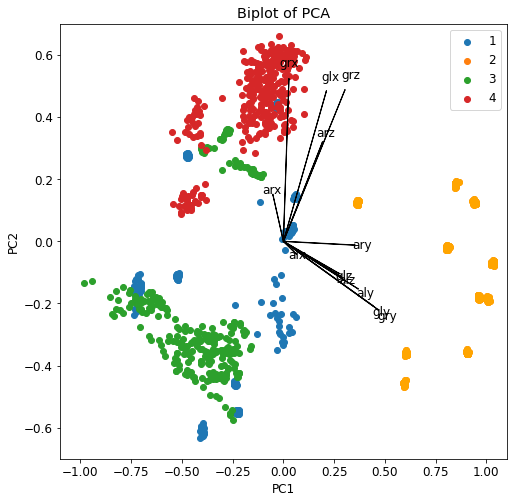

In [54]:
higlight_plot_biplot(2,True)